In [1]:
import numpy as np
import pandas as pd
import re
import os
from pandas.plotting import scatter_matrix

get_ipython().magic(u'env OMP_NUM_THREADS=2')

from IPython.display import display, HTML

%matplotlib inline
import matplotlib.pyplot as plt

#get_ipython().magic(u'matplotlib')
#get_ipython().magic(u'matplotlib inline')

# Set the ransom seed used for the whole program to allow reprocibility
np.random.seed(3214412)

from scipy.stats import pearsonr

env: OMP_NUM_THREADS=2


In [2]:
data_file = 'AirQualityUCI.csv'

In [3]:
# For European data use , as the decimal point
raw_df = pd.read_csv(data_file, sep=';', decimal=',')

In [4]:
raw_df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [5]:
print(raw_df.columns)

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')


# Subset Test Dataset
Every column in the dataset can be analyzed as a timeseries column.

For now just do a timeseries analysis of timestamp to CO(GT) concenteration

Missing values are labeled with -200

In [27]:
# Limit to the timestamp column and the CO(GT) concentration
data_df = pd.DataFrame.copy(raw_df[['Date', 'Time', 'CO(GT)']])

# Cleanup the timestamp
data_df = data_df[~data_df.Date.isnull()]
data_df['timestamp'] = data_df['Date'] + 'T' + data_df['Time']
print(data_df.timestamp.iloc[0])
data_df['timestamp'] = pd.to_datetime(data_df['timestamp'].str.replace('/', '-').str.replace('.', ':'))
data_df = data_df.rename(columns={'CO(GT)': 'CO_GT'})
print('Dropping rows where the CO_GT is missing')
data_df = data_df[data_df.CO_GT >= 0]
data_df = data_df.set_index('timestamp')
data_df.drop(labels=['Date', 'Time'], axis=1, inplace=True)
data_df.sort_index(inplace=True)
display(data_df.describe())
display(data_df.head())

10/03/2004T18.00.00
Dropping rows where the CO_GT is missing


,CO_GT
count,7674.000000
mean,2.152750
std,1.453252
min,0.100000
25%,1.100000
50%,1.800000
75%,2.900000
max,11.900000


,CO_GT
timestamp,
2004-01-04 00:00:00,1.6
2004-01-04 01:00:00,1.2
2004-01-04 02:00:00,1.1
2004-01-04 03:00:00,0.9
2004-01-04 04:00:00,0.7


# Visualizations

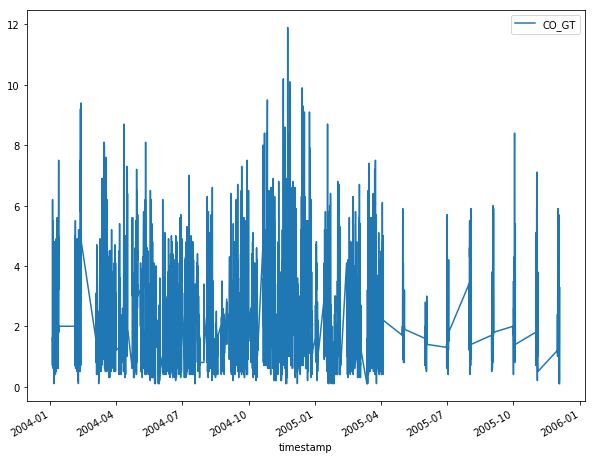

In [29]:
from matplotlib import pyplot
data_df.plot(figsize=(10, 8))
pyplot.show()

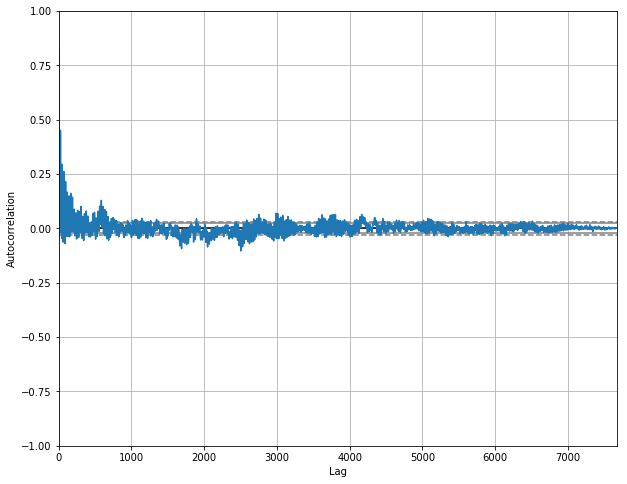

In [34]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10, 8))
autocorrelation_plot(data_df)
pyplot.show()